# Stacks
## Introduction
- A stack is an example of an **abstract data type**
    - A convention for organising data
    - With well-defined/understood operations and behaviour
- The foundation for implementing a key aspect of software behaviour: "methods" / "functions" / "procedures" / "subroutines"
- Convenient for other purposes too
- Analogous to a stack of paper / cards / bricks

## Pushing and Popping
- PUSH: Place an item on the top of the stack
- POP: Pop an item from the top of the stack

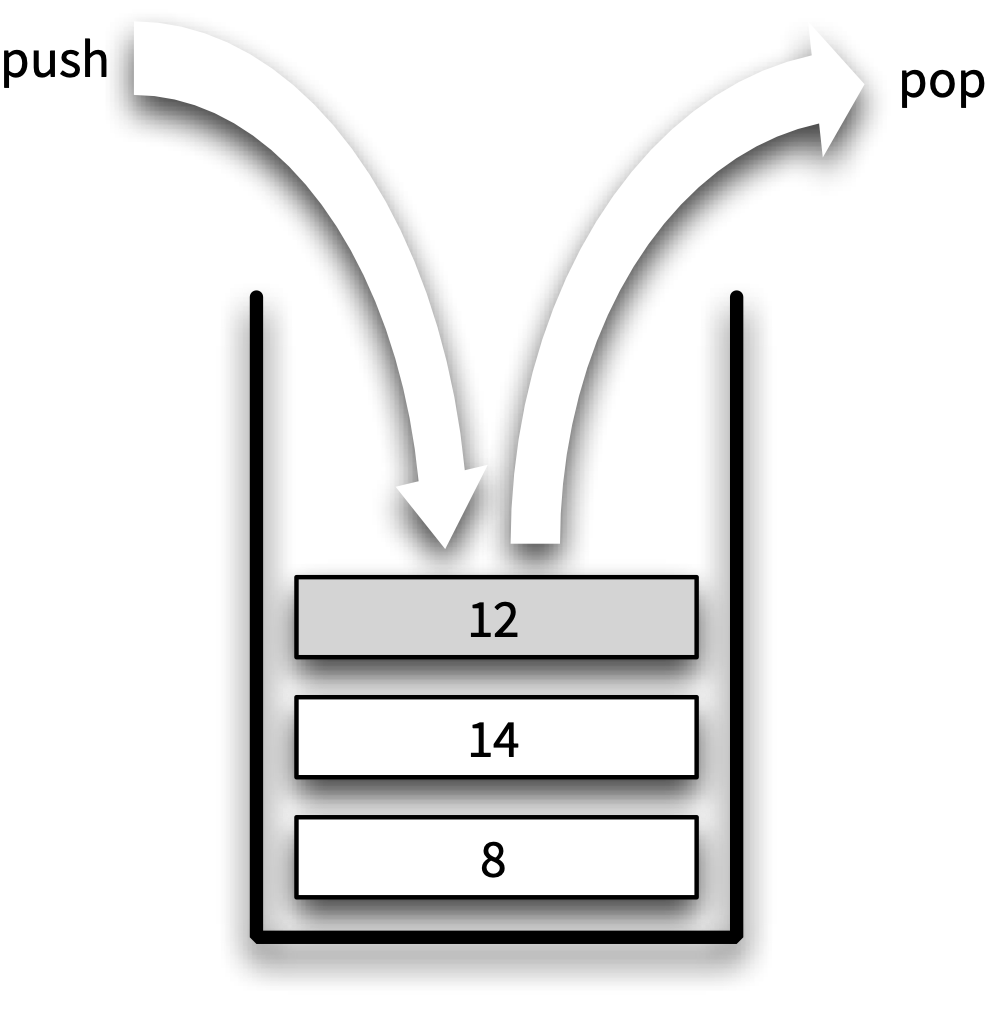

## Implementation
We need ...
- An area of memory to store the data on the stack
- A Stack Pointer (SP) – a register to store the address of the *top of stack*
- A stack *growth convention* – a set of rules foverning how items are pushed/popped

## Growth Convention
There are four possible stack *growth conventions*
- Full Descending
- Full Ascending
- Empty Descending
- Empty Ascending

Where ...
- Full / Empty determines whether the stack pointer (SP) contains the address ...
    - where the next item should be pushed (**empty**) or the address
    - where the last item was pushed (**full**)
- Acsending / Descending determines whether the stack pointer ...
    - increases towards higher memory addresses as we push data on to the stack (**ascending**) or
    - decreases towards lower memory addresses as we push data on to the stack (**descending**)

Unless told otherwise, you should assume that a stack is **full descending**.

## The System Stack
We will almost always use the *System Stack*.

- a stack that is initialised when the computer starts
- uses a special register, `R13`, as the *System Stack Pointer*

`R13` can also be referred to as `SP`

You can, of course, implement your own stack if you want. You just need

- an area of memory to store the stack
- a way of remembering the *top of stack* address 

## Pushing data on to a stack
To push a word on to the ARM System Stack ...
- decrement the address in the stack pointer by 4 bytes (4 bytes == 1 word == 32 bits)
- store the word to memory at the new stack pointer address
Let's see this in action using ARM Assembly Language.
First, let's look at the stack before we push anything ...

In [ ]:
>>> show stack as hex

Now let's push a single word-size value from register R0 and look at the stack again ...

In [ ]:
MOV R0, #0x123
SUB SP, SP, #4
STR R0, [SP]
>>> show stack as hex

## Popping data off a stack
We can pop the word back off the stack by revering the order and effect of the operations.

Let's pop the word off the top of the stack into R4 this time ...

In [ ]:
LDR R4, [SP]
ADD SP, SP, #4
>>> show registers[r4] as hex

The stack show now be empty again.

In [ ]:
>>> show stack as hex

## Pushing and Popping multiple registers
We can push the contents of several registers by just repeating the operations. First, initialise some registers.

In [ ]:
MOV R4, #0x40
MOV R5, #0x50
MOV R6, #0x60
>>> show registers[4-6] as hex

Push three words and examine the new stack contents.

In [ ]:
SUB SP, SP, #4
STR R4, [SP]

SUB SP, SP, #4
STR R5, [SP]

SUB SP, SP, #4
STR R6, [SP]

>>> show stack as hex

We can pop the three values off again by reversing the order and effect of the operations.

Let's try to pop the values off the stack back into their original register this time.

Remember, stacks are **Last In First Out** data structures so if we want to pop the value that was pushed from `R6`, we need to pop it first!!

In [ ]:
LDR R4, [SP]
ADD SP, SP, #4

LDR R5, [SP]
ADD SP, SP, #4

LDR R6, [SP]
ADD SP, SP, #4

>>> show registers[4-6] as hex

Finally, let's check that the stack is now empty again.

In [ ]:
>>> show stack as hex

## Better addressing modes for stacks
So far we have used two instructions to push or pop a single word on or off a stack.

We can reduce this if we use the pre- and post-indexed addressing modes.

Let's push three words on to the stack again, this time using pre-indexed addressing.

In [ ]:
STR R4, [SP, #-4]!
STR R5, [SP, #-4]!
STR R6, [SP, #-4]!
>>> show stack as hex

We can pop the values off the stack using port-indexed addressing. Let's pop the values off into different registers this time.

In [ ]:
LDR R9, [SP], #4
LDR R8, [SP], #4
LDR R7, [SP], #4
>>> show registers[7-9] as hex

The stack should now be empty again.

In [ ]:
>>> show stack as hex

# Load Multiple (`LDM`) and Store Multiple (`STM`)
The ARM instruction set provides us with instructions that load/store the contents of multiple registers from/to memory using a single instruction.

We will experiment with a sequence of four words in memory, initially all zero.

In [ ]:
__config__
memory:
    items:
        testbed:
            type: word
            access: rw
            content: [0, 0, 0, 0]

We will set `R0` to the start address of the sequence of words.

In [ ]:
LDR R0, =testbed
>>> show registers[0] as hex

### STMIA
We can store multiple registers to memory with a single STMIA instruction. The `IA` here means *increment after* – the first register is stored at the address we specify and the subsequent registers are stored at successively increasing addresses.

First, initialise some registers with values that will be stored in memory.

In [ ]:
MOV R4, #0x25
MOV R5, #0x35
MOV R6, #0x45
MOV R7, #0x55

Store the four values to memory using a single `STMIA` instruction and example the new contents of memory.

In [ ]:
STMIA R0, {R4-R7}
>>> show mem[testbed] as hex

### LDMIA
Similarly, we can use LDMIA to *load* the contents of multiple registers sequentially from memory. Again the `IA` here means that the registers are loaded from increasing addresses.

In [ ]:
LDMIA R0, {R8-R11}
>>> show registers[8-11] as hex

### Decrement Before with `STMDB` and `LDMDB`
As as well as the *increment after* mode of operation for `LDM` and `STM`, the ARM instruction set also supports a *decrement before* mode of operation with `LDMBD` and `STMDB`.

To see `DB` in action, we will initialise a new sequence of four word-size values in memory but this time we will adjust R0 to the address just past the end of our sequence of four words by adding 16 (0x10)

In [ ]:
__config__
memory:
    items:
        testbed2:
            type: word
            access: rw
            content: [0, 0, 0, 0]

In [ ]:
LDR R0, =testbed2
ADD R0, R0, #0x10
>>> show registers[0] as hex

Let's store the contents of R4, R5 and R6 using `STMDB`. The *first* register is stored in memory at the address just before the address in R0. Subsequent registers are stored at decreasing addresses.

In [ ]:
STMDB R0, {R4-R6}
>>> show mem[testbed2] as hex

### "Highest numbered register at the highest address"
You might have expected to see the contents of the registers in the reverse order. However, `LDM` and `STM` always load or store the highest numbered register at the highest address, regardless of the mode of operation or the order in which registers are specified.

We can specify the list of registers to be stored in a different way, suggesting a different order, but the effect will be identical.

In [ ]:
STMDB R0, {R6, R5, R4}
>>> show mem[testbed2] as hex

We can also load values into registers using `LDRDB` this time. Again, the highest numbered register will correspond to the highest address.

In [ ]:
LDMDB R0, {R9, R8, R10}
>>> show registers[8-10] as hex

# `LDM`, `STM` and Stacks
We can use `LDM` and `STM` to push and pop the contents of multiple registers on and off the stack with a single instruction.

Since we are using a full decending stack, we will use:

- STMDB to push on to the stack because we want to **decrement** the stack pointer **before** storing each value on the top of the stack
- LDMIA to pop off the stack because we want to **increment** the stack pointer **after** loading each value from the top of the stack

However, we also want the changes the stack pointer to be permanent. In other words, after decrementing the stack pointer, it should stay decremented. There is a special mode of operation for `LDM` and `STM` that does exactly this. We specify this mode of operation with a `!` after the register containing the address.

## Pushing on to the stack using STMDB

In [ ]:
STMDB SP!, {R4-R6}
>>> show stack as hex

### Popping off the stack using LDMIA
(Note again that the order of the registers doesn't change anything.)

In [ ]:
MOV R4, #0x123
MOV R5, #0x123
MOV R6, #0x123

LDMIA SP!, {R5, R4, R6}

>>> show registers[4-6] as hex

The stack should now be empty again.

In [ ]:
>>> show stack as hex

Using `STMDB` and `LDMIA` to push and pop is such a common operation that we have two "pseudo instructions" that we can use instead of them.

In [ ]:
PUSH {R4-R6}
>>> show stack as hex

In [ ]:

POP {R4-R6}

>>> show registers[4-6] as hex

And the stack should now be empty again.

In [ ]:
>>> show stack as hex